In [1]:
import pandas as pd

In [2]:
y = pd.read_csv("./acol_simulated_Y.txt", sep="\t")
z_species = pd.read_csv("./acol_simulated_Z_species.txt", sep="\t")

In [3]:
sum_of_y_states = y.groupby("molecules")["Y_state"].sum()

In [4]:
sum_of_y_states

molecules
beijing          1
berlin          59
bogota          60
brasilia         1
buenos_aires    58
                ..
unibe           59
unifr            1
unige           59
unil             2
washington      59
Name: Y_state, Length: 139, dtype: int64

In [5]:
import matplotlib.pyplot as plt

sum_y_z_0 = sum_of_y_states[z_species[z_species["Z_state"] == 0].molecules]

In [6]:
print(sum_y_z_0.mean())
print(sum_y_z_0.var())

0.8108108108108109
0.7582376897445389


In [7]:
import numpy as np
from scipy.linalg import expm


P = expm(np.array([[-0.5, 0.5], [0.5, -0.5]]) * 0.0166667 * np.exp(0.5))

In [8]:
P[0, 1] * len(y.species.unique())

np.float64(0.8131390991205035)

In [9]:
P[0, 0] * P[0, 1] * len(y.species.unique())

np.float64(0.8021191792118618)

(array([31.,  0., 30.,  0.,  0., 10.,  0.,  2.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

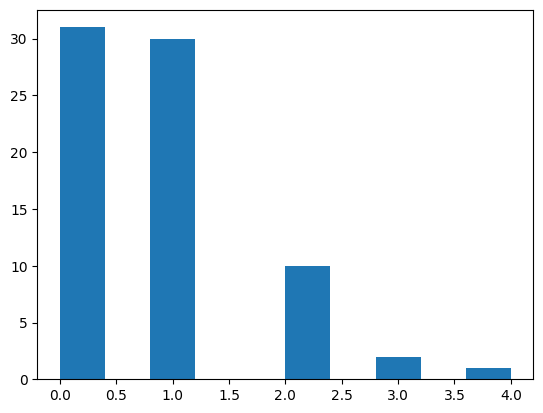

In [10]:
plt.hist(sum_y_z_0)

In [11]:
import networkx as nx

G = nx.balanced_tree(2, 3)

mapping = {i: f"species_{i}" for i in G}

In [12]:
graph = nx.Graph()
for i in range(10):
    graph.add_edge(f"species_leaf_{i}", f"species_root_{i}")

In [13]:
from generate_data import Tree, TreeType, ParameterGenerator

In [14]:
molecules_tree = Tree(278, TreeType.grass, "molecules")
species_tree = Tree(60, TreeType.star, "species")

In [15]:
ParameterGenerator(
    (species_tree, molecules_tree), "molecules", 0.5, 0.2, 6.3, 0.5, 10
).params_to_dataframe().to_csv("test_out_params.csv", sep="\t", index=False)